In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication3
from algorec.utils import generate_synthetic_data

In [3]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.5  # 0.5  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
population.action_set_.ub = [1, 1]
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication3(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

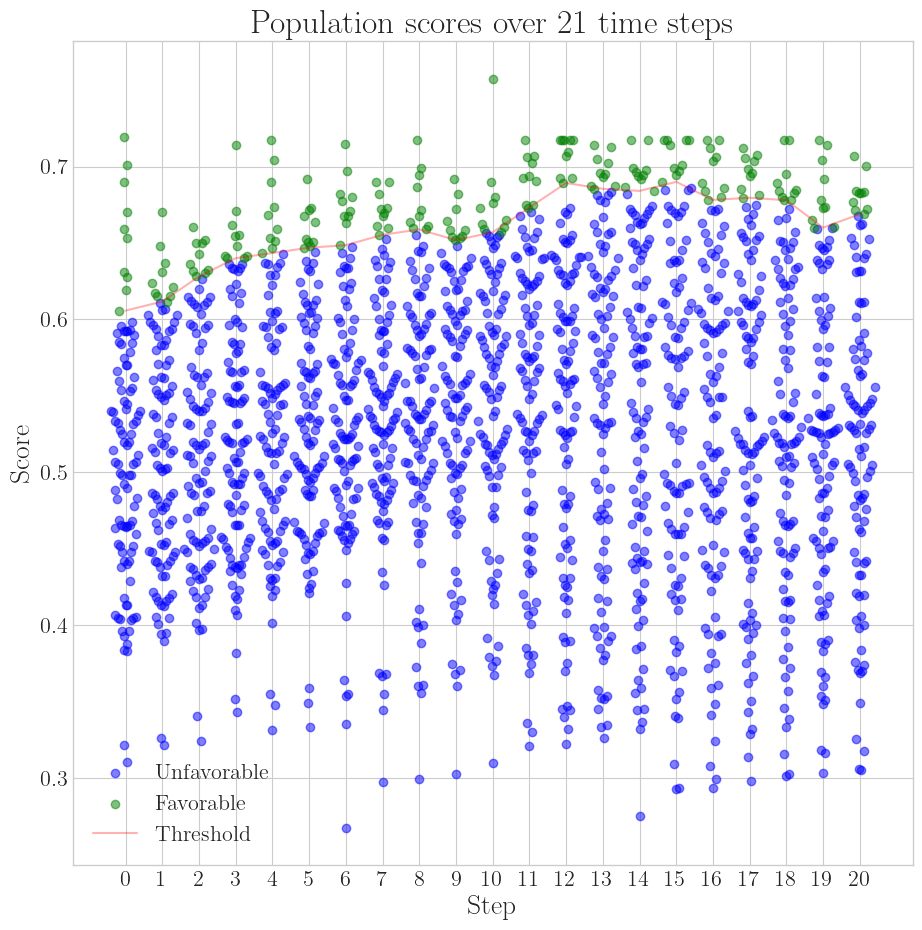

In [5]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=8'}, xlabel='f_0', ylabel='f_1'>

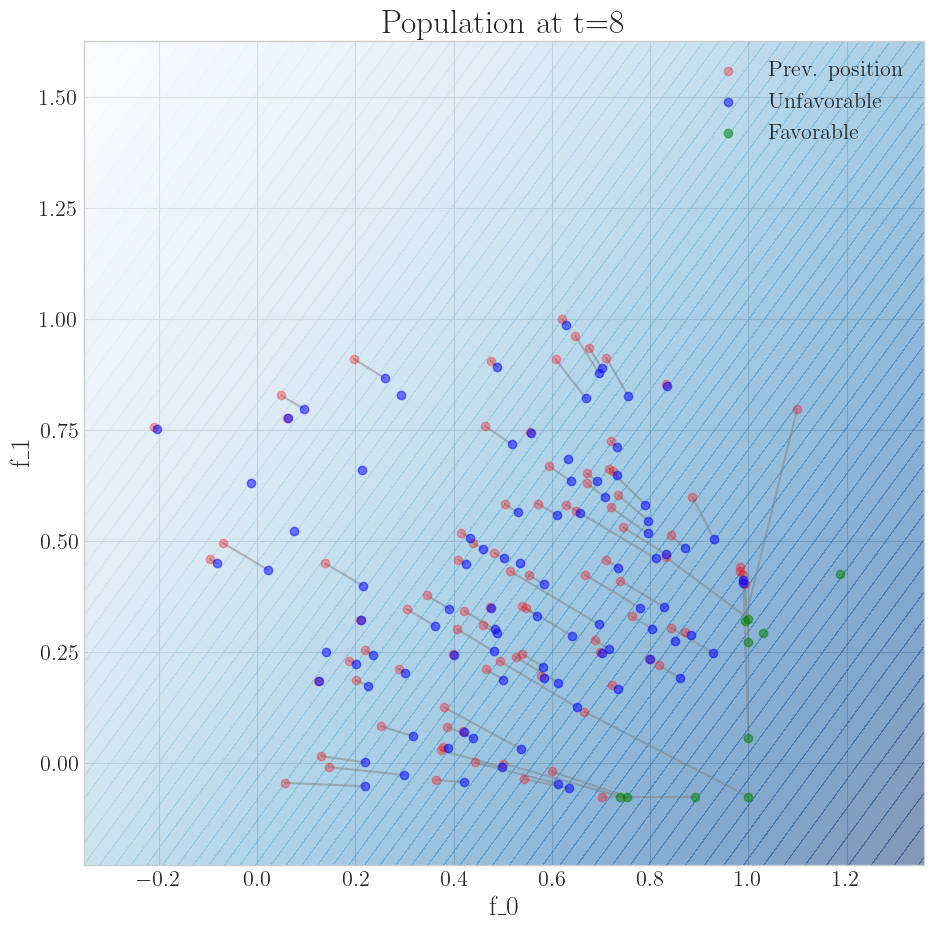

In [6]:
environment.plot.scatter(8)

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

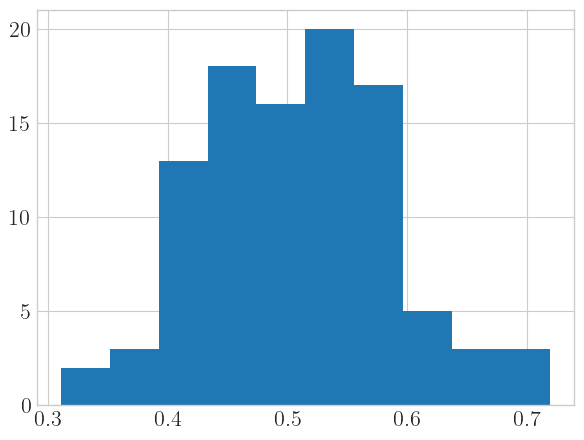

In [7]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

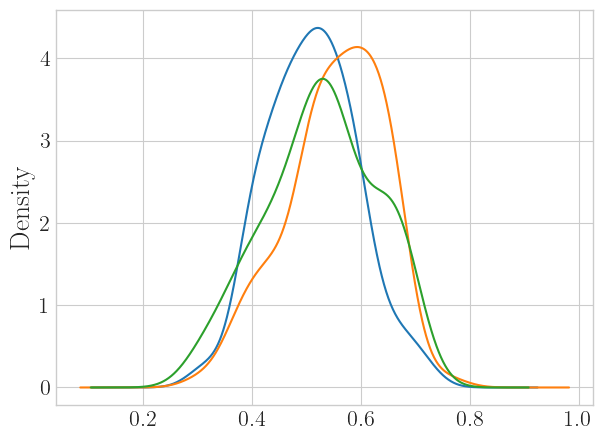

In [18]:
environment.plot.scores_kde(0)
environment.plot.scores_kde(10)
environment.plot.scores_kde(20)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

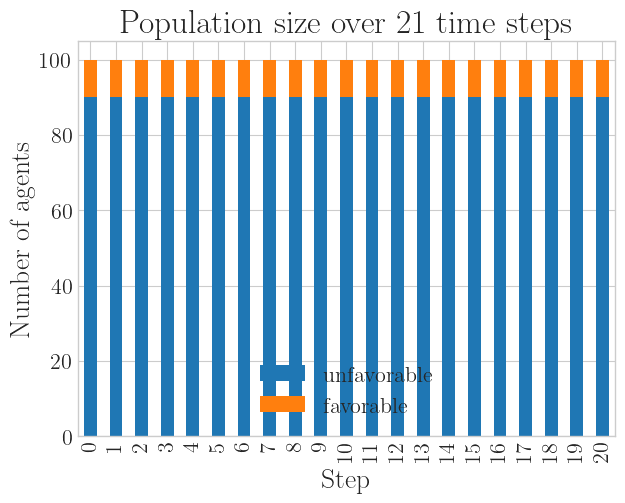

In [9]:
environment.plot.population_size()

In [10]:
environment.success_rate(1, 20)

array([0.75      , 0.64285714, 0.625     , 0.9       , 0.90909091,
       0.90909091, 0.90909091, 1.        , 1.        , 0.66666667,
       0.64285714, 1.        , 1.        , 1.        , 0.83333333,
       1.        , 1.        , 1.        , 1.        ])

In [11]:
environment.threshold_drift(1, 20)

array([ 0.00979872,  0.02679376,  0.01906404,  0.00527072,  0.00543777,
        0.00254115,  0.01045056,  0.00531887, -0.01061301,  0.00803024,
        0.02449863,  0.02391575, -0.0055889 , -0.00196447,  0.00867473,
       -0.01716588,  0.00213779, -0.00245877, -0.02636922,  0.01341162])

In [12]:
steps_info = environment.steps_info()
steps_info.tail(10)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
11,90.0,14.0,10.0,0.642857,0.673137,0.024499,10.0,0.03,0.126159,0.156320
12,90.0,10.0,10.0,1.000000,0.689236,0.023916,10.0,0.03,0.072783,0.883412
13,90.0,7.0,10.0,1.000000,0.685384,-0.005589,10.0,0.03,0.113891,0.270690
14,90.0,7.0,10.0,1.000000,0.684037,-0.001964,10.0,0.03,0.138055,0.060829
15,90.0,12.0,10.0,0.833333,0.689971,0.008675,10.0,0.02,0.104262,0.407028
16,90.0,5.0,10.0,1.000000,0.678127,-0.017166,10.0,0.03,0.097813,0.515864
17,90.0,9.0,10.0,1.000000,0.679577,0.002138,10.0,0.03,0.100312,0.464114
18,90.0,8.0,10.0,1.000000,0.677906,-0.002459,10.0,0.03,0.091269,0.608839
19,90.0,5.0,10.0,1.000000,0.660030,-0.026369,10.0,0.04,0.113433,0.226441
20,90.0,11.0,10.0,0.727273,0.668882,0.013412,10.0,0.04,0.089370,0.643645


,success_proba,threshold_drift
success_proba,1.000000,0.689425
threshold_drift,0.689425,1.000000


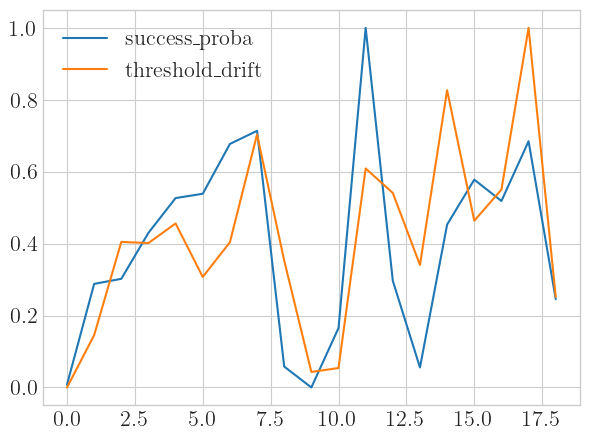

In [13]:
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.threshold_drift.iloc[1:].reset_index(drop=True) * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

In [14]:
steps_info.astype(float).corr().round(2)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
n_adapted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_candidates,NaN,1.00,NaN,-0.84,-0.36,0.85,NaN,0.30,0.06,-0.01
favorable_outcomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
success_rate,NaN,-0.84,NaN,1.00,0.47,-0.68,NaN,-0.38,-0.39,0.36
threshold,NaN,-0.36,NaN,0.47,1.00,-0.21,NaN,-0.98,-0.45,0.37
threshold_drift,NaN,0.85,NaN,-0.68,-0.21,1.00,NaN,0.21,-0.07,0.16
new_agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_agents_proba,NaN,0.30,NaN,-0.38,-0.98,0.21,NaN,1.00,0.45,-0.33
moving_agent_proba,NaN,0.06,NaN,-0.39,-0.45,-0.07,NaN,0.45,1.00,-0.96
success_proba,NaN,-0.01,NaN,0.36,0.37,0.16,NaN,-0.33,-0.96,1.00


In [15]:
environment.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,2,2.0,0.592102,0.632114,1
1,0,4,4.0,0.519861,0.689915,0
2,0,14,14.0,0.417626,0.694533,0
3,0,2,2.0,0.537543,0.636339,0
4,0,1,1.0,0.555235,0.631024,0
...,...,...,...,...,...,...
295,20,0,NaN,0.527508,NaN,0
296,20,0,NaN,0.440719,NaN,0
297,20,0,20.0,0.672496,0.672496,0
298,20,0,NaN,0.482892,NaN,0
